## K - Means

K-Means é um agrupamento de pontos, utilizando a média de valores de cada cluster, além de sua variância para identificar cada grupo. Aqui utilizaremos um número _n_ de pontos aleatórios, sendo esses chamados de centróides, calculando-se então a distância euclidiana de cada ponto do dataset a cada centróide. Feito isso, estabelece-se um novo centróide para cada cluster, a partir, novamente, da posição de cada ponto. O processo é repetido até que se alcance a convergência. Importante salientar que busca-se evitar o mínimo local, tentando atingir o valor mais próximo do mínimo global.

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
subset_seed = 97404

In [4]:
dataset_name = "Final Data.csv"
df_1 = pd.read_csv(dataset_name)
features = ["latitude", "wind_speed", "wind_degree", "pressure", "humidity", "cloudcover", "uv_index", "visibility"]

X1 = df_1.reindex(features, axis = 1)

Normalizando o dataset.

In [5]:
sc_1 = StandardScaler()
sc_1.fit(X1)
X_norm = sc_1.transform(X1)

In [6]:
n_clusters = 5 #definidas 5 clusters, baseado nas escalas de temperatura adotadas (muito frio, frio, temperatura mediana, quente, muito quente)

kmeans = KMeans(
    n_clusters = n_clusters, #define-se o número de clusters com base no que fora definido anteriormente.
    init = "random",
    n_init = 15, #número de inicializações.
    max_iter = 300, #número máximo de iterações.
    tol = 1e-04, #tolerância.
    random_state = subset_seed
)

y_kmeans = kmeans.fit_predict(X_norm) #Fitando o K-Means.

Plotando os dados.

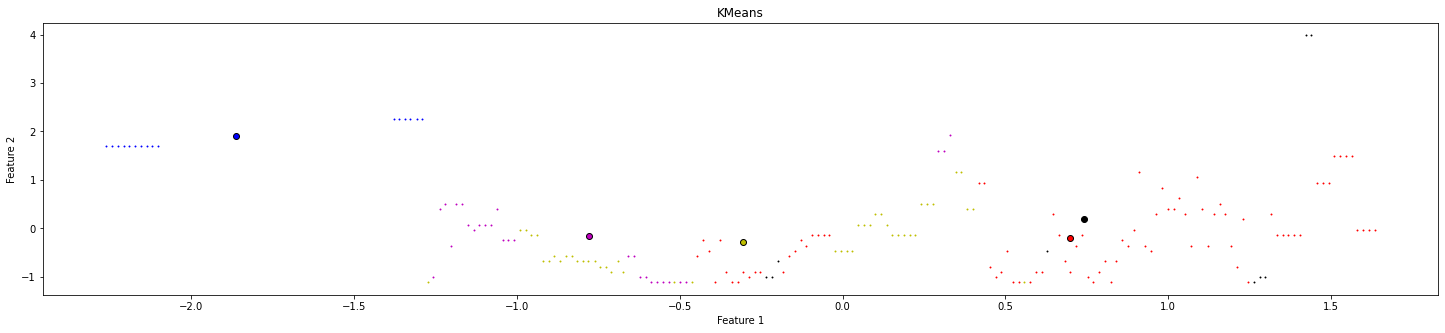

In [7]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroides = kmeans.cluster_centers_ #extração dos centróides.
labels = pairwise_distances_argmin(X_norm, centroides) #rotulando os clusters.

cores = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), cores): #desempacotando a lista.
    my_members = labels == k
    #print(my_members)
    cluster_center = centroides[k]
    ax.plot(
        X_norm[my_members, 0],
        X_norm[my_members, 1],
        markerfacecolor = col,
        marker = ".",
        markeredgecolor = "w",
        linewidth = 0
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        marker = "o",
        markerfacecolor = col,
        markeredgecolor = "k",
        markersize = 6,
        linewidth = 0
    )
    
ax.set_title("KMeans") #nomeando o gráfico.
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show() #printando o gráfico.

Esse gráfico representa um modo de visualizar os clusters encontrados pelo método de K-Means. Contudo, há um problema, uma vez que esse gráfico apresenta mais de duas dimensões, impedindo a visualização completa dos clusters.

Fazendo o PCA.

In [8]:
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

O PCA foi feito de modo a haver a redução de dimensionalidade. Assim, o modelo se apresenta mais simplificado, podendo melhorar, ou não, o resultado obtido. 

K-Means com PCA.

In [9]:
n_clusters2 = 5

kmeans = KMeans(
    n_clusters = n_clusters2,
    init = "random",
    n_init = 15,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0
)

y_kmeans2 = kmeans.fit_predict(X_pca)

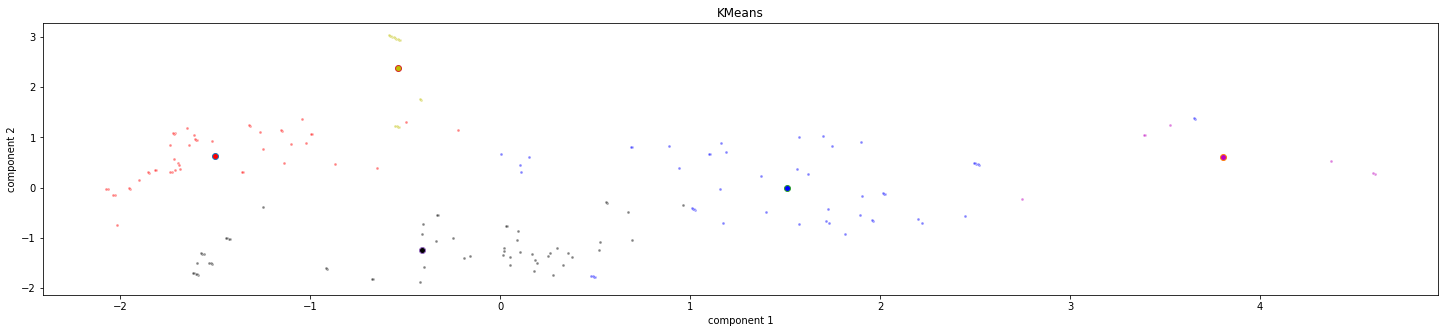

In [10]:
centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

Agora, feito o PCA, e consequentemente havendo a redução de dimensionalidade, tornou-se possível observar a formação de possíveis clusters, sendo eles divididos em 5 grupamentos de dados.

Colorindo a partir da temperatura.

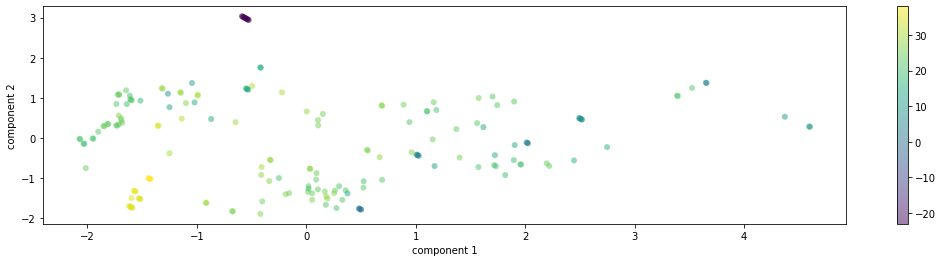

In [11]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_1["temperature"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

A coloração dos dados a partir da temperatura permite uma melhor interpretação dos dados. Além disso, permite ver se o agrupamento nos clusters estão condizentes.

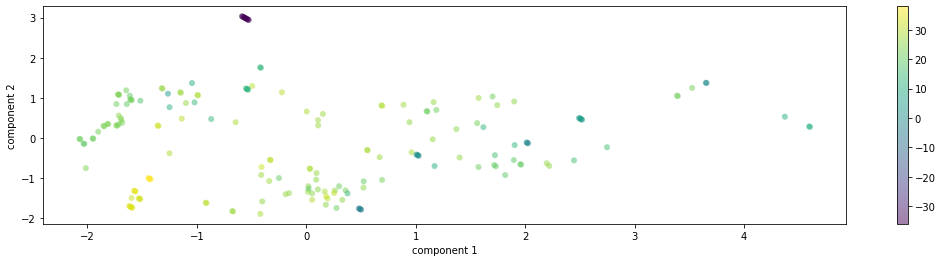

In [12]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_1["feelslike"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Aqui, percebemos que ambos gráficos apresentam informações muito similares, mostrando que K-Means capturou bem os clusters, mesmo não tendo ideia dos valores de temperatura e sensação térmica.

Agora, buscaremos otimizar o número de clusters utilizados. Para isso, será utilizado o método do cotovelo, que consiste no cálculo da distância entre os pontos do cluster e todos os demais pontos. Para a otimização, queremos o ponto do gráfico que será plotado diretamente anterior a diminuição lenta dos dados.

In [13]:
sum(np.isfinite(X_pca))
# X_pca.shape
X_pca

array([[ 0.50112546, -1.78328793, -2.01260304, ..., -0.306441  ,
         0.26089884,  0.33953278],
       [ 0.49433503, -1.77297386, -2.01336088, ..., -0.30400701,
         0.24947345,  0.33547221],
       [ 0.48745029, -1.76251655, -2.01412923, ..., -0.30153921,
         0.23788938,  0.33135523],
       ...,
       [-0.57370616,  3.01365745,  2.26039495, ...,  0.00998104,
        -0.54295225,  0.14488549],
       [-0.58125108,  3.02511752,  2.25955292, ...,  0.01268548,
        -0.55564712,  0.14037373],
       [-0.58785289,  3.03514508,  2.25881613, ...,  0.01505186,
        -0.56675514,  0.13642595]])

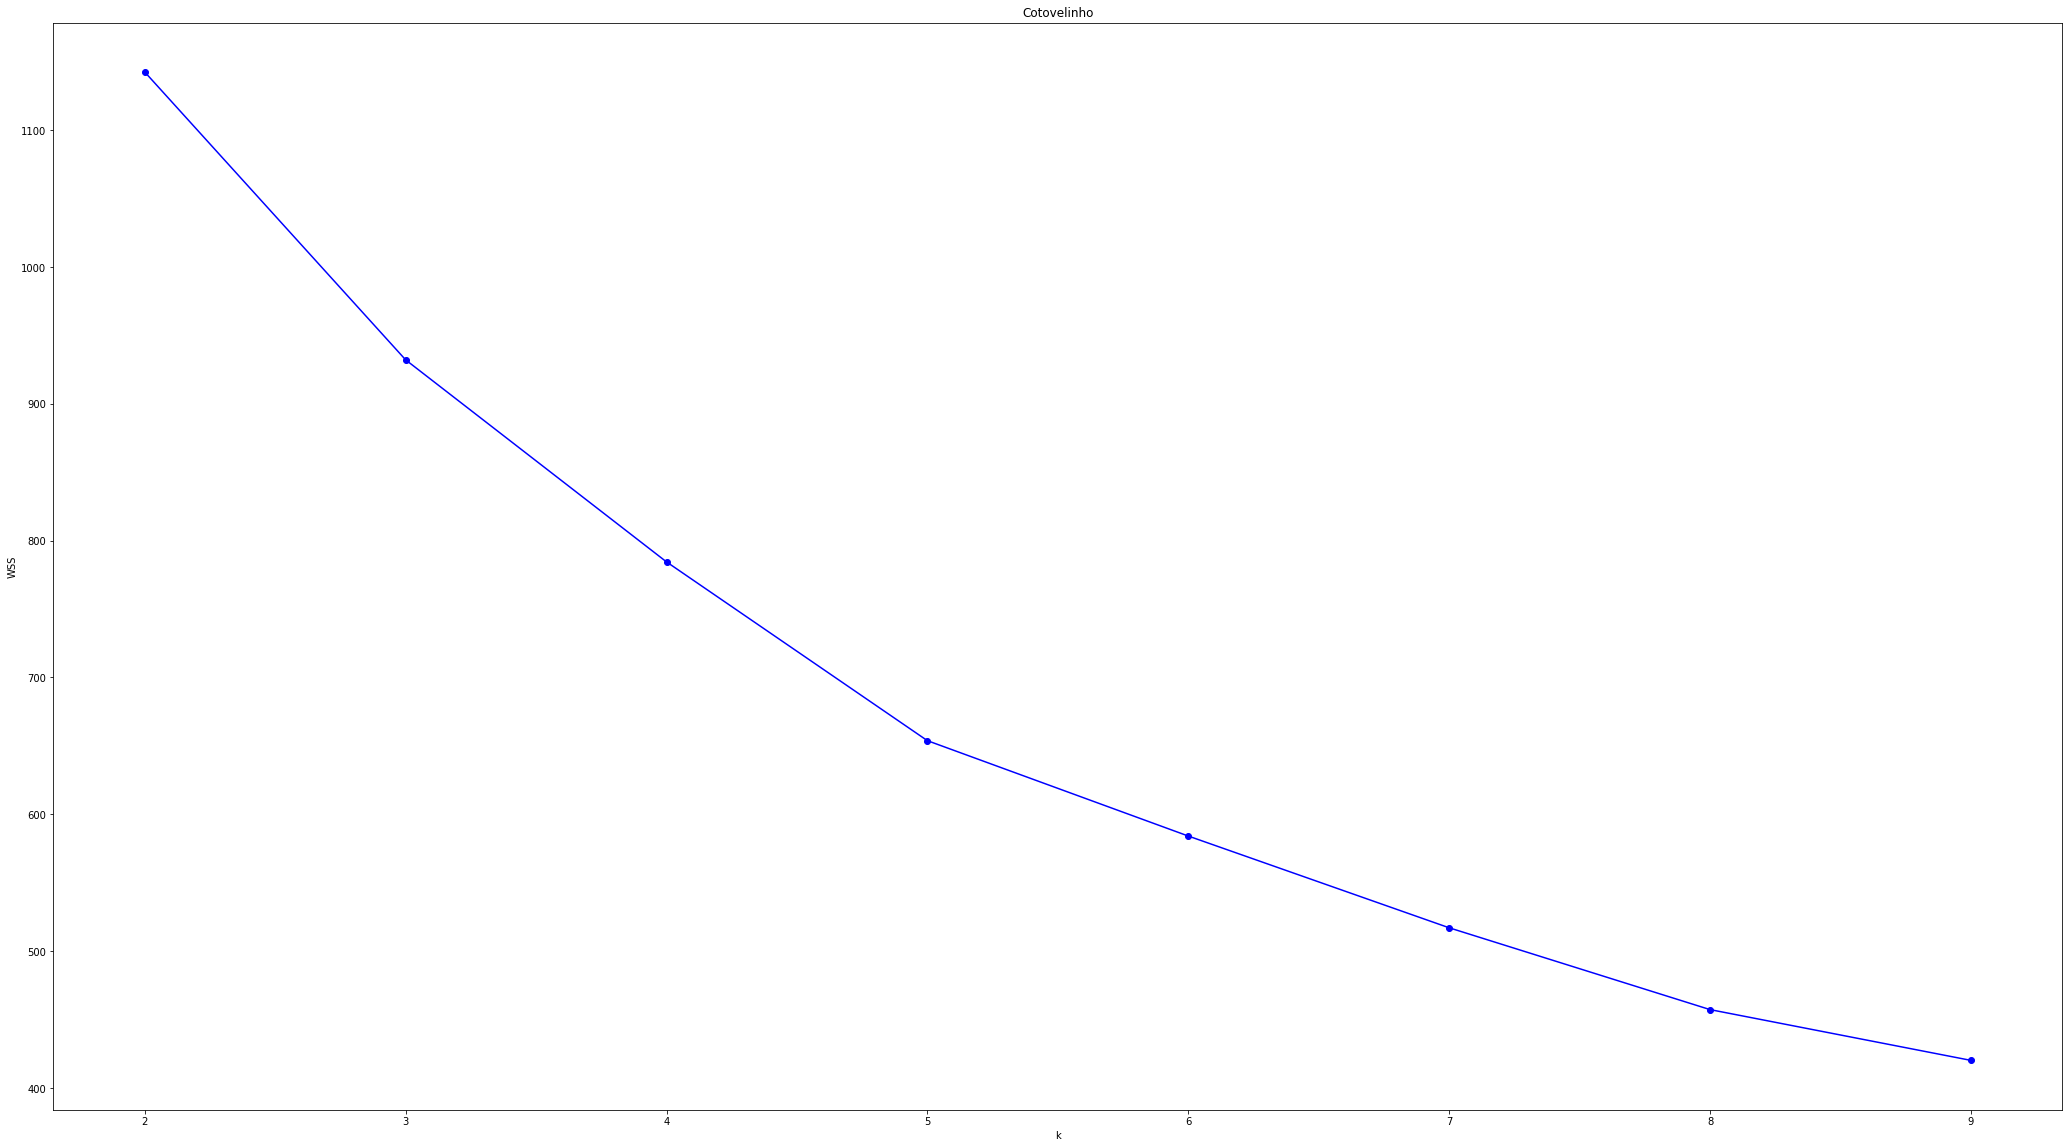

In [14]:
WSS = []

for k in range(2,10):
    kmeans = KMeans(
        n_clusters = k,
        init = "random",
        n_init = 15,
        max_iter = 300,
        tol = 1e-04,
        random_state = 0
    )
    y_kmeans = kmeans.fit(X_pca)
    WSS.append(kmeans.inertia_)
    
plt.figure(figsize=(36, 20))
plt.plot(range(2, 10), WSS, "-bo")
plt.xlabel("k")
plt.ylabel("WSS")
plt.title("Cotovelinho")
plt.show()

É possível indicar a formação de um possível cotovolo na região de 5 vizinhos, o que mostra que, justamente, o melhor número seria 5.

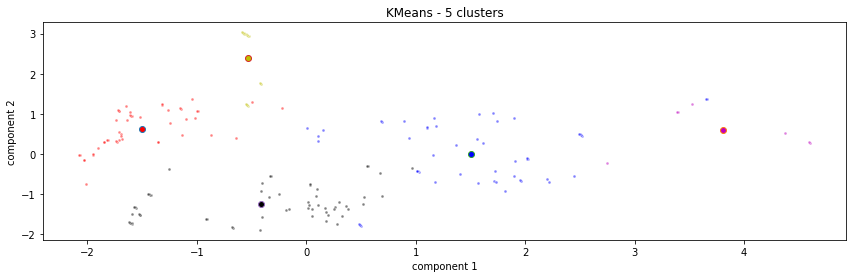

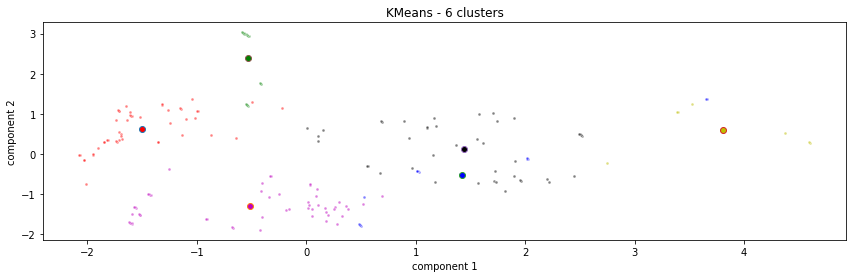

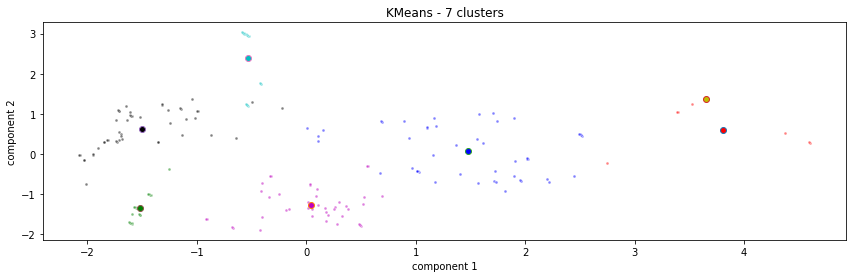

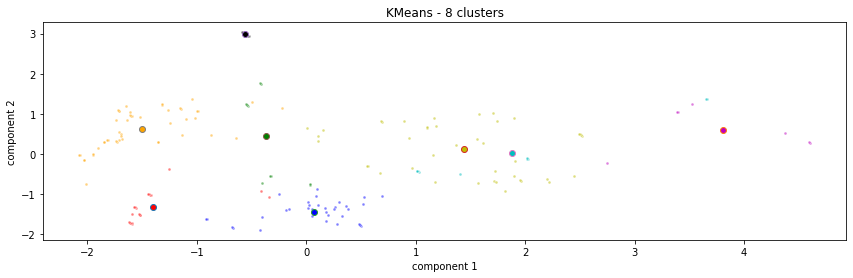

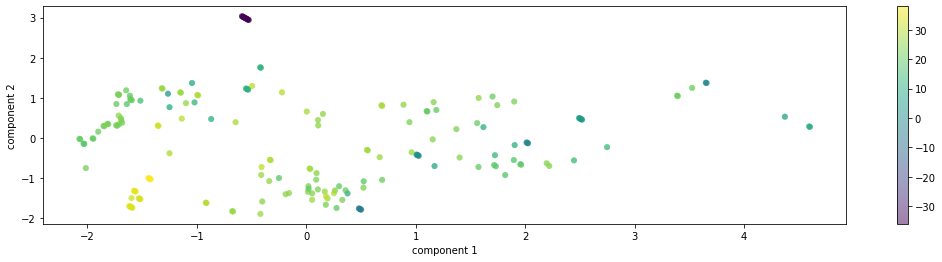

In [15]:
for numberofclusters in range(5,9):

    n_clusters=numberofclusters

    kmeans = KMeans(
        n_clusters=n_clusters, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )

    y_kmeans = kmeans.fit_predict(X_pca)

    centroids = kmeans.cluster_centers_
    labels = pairwise_distances_argmin(X_pca, centroids)
    colors = ["r", "m", "b", "y", "k", "g", "c", "orange"]

    fig = plt.figure(figsize=(14.4, 4))
    ax = fig.add_subplot()

    for k, col in zip(range(n_clusters), colors):
        my_members = labels == k
        cluster_center = centroids[k]
        ax.plot(
            X_pca[my_members, 0],
            X_pca[my_members, 1],
            "w", 
            markerfacecolor=col,
            marker=".",
            alpha = 0.5,
            linewidth=0)
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markersize=6,
            alpha = 1.0,
            linewidth=0
        )
    title = 'KMeans - ' + str(numberofclusters) + " clusters"
    ax.set_title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2')

    plt.show()


fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_1["temperature"].values)
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_1["feelslike"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Analisando os gráficos, percebe-se que o melhor numero de clusters foi quando havia 5 clusters, sendo o número ideal, pois existe uma divisão clara entre os clusters e não há pontos próximos. Alguns pontos que era adicionados se encontravam muito próximos dos demais, o que não adicionava muito.

### Plot 3D

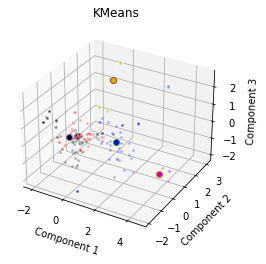

In [16]:
#%matplotlib notebook
#from mpl_toolkits import mplot3d

n_clusters=5

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure() #figsize=(22, 10))
ax = fig.add_subplot(projection='3d')

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0], 
        X_pca[my_members, 1],
        X_pca[my_members, 2],
        "w", 
        markerfacecolor=col, 
        marker=".",
        linewidth=0,
        alpha=0.3
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        cluster_center[2],
        "o",
        markerfacecolor=col,
        #markeredgecolor="k",
        markersize=6,
    )

ax.set_title("KMeans")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()


Há uma melhora na visualização com o modelo 3D, porém, ainda não é possível observar tudo que é desejado.